# Test Case with HSPICE-1 Model


## Tool setup

In [3]:
# install conda
import os
CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  !python -m pip install condacolab
  import condacolab
  condacolab.install()

# install ngspice
!conda install -c conda-forge ngspice

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:18
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ngspice


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.6.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    gettext-0.22.5             |       h59595ed_2         464 KB  conda-forge
    gettext-

## Model HSPICE-1

In [1]:
%%writefile /content/models.spice
* NMOS Transistor Model
* NMOS Transistor Model
.model NMOS_Model NMOS (LEVEL=1             ; Level 1 model
    + TOX=20n           ; Oxide thickness
    + LD=0.2u           ; Lateral diffusion
    + VTO=0.7           ; Threshold voltage
    + LAMBDA=0.03       ; Channel length modulation
    + UO=600            ; Low-field electron mobility (cm2/Vs)
    + GAMMA=0.298       ; Body effect factor (V^0.5)
    + PHI=0.688         ; Surface inversion potential
    + RS=40             ; Diffusion sheet resistance (/2)
    + CJ=271e-6         ; Zero-bias bulk junction capacitance (F/m2)
    + CJSW=600e-12       ; Zero-bias sidewall bulk junction capacitance (F/m)
    + MJ=0.5            ; Bulk junction grading coefficient
    + PB=0.904          ; Bulk junction contact potential
    + CGDO=346e-12       ; Gate-drain overlap capacitance (F/m)
    + CGSO=346e-12       ; Gate-source overlap capacitance (F/m)
    + KF=4e-24          ; Flicker noise coefficient (V2F)
)


* PMOS Transistor Model
* PMOS Transistor Model
.model PMOS_Model PMOS (LEVEL=1             ; Level 1 model
    + TOX=20n           ; Oxide thickness
    + LD=0.2u           ; Lateral diffusion
    + VTO=0.9           ; Threshold voltage
    + LAMBDA=0.06       ; Channel length modulation
    + UO=200            ; Low-field electron mobility (cm2/Vs)
    + GAMMA=0.471       ; Body effect factor (V^0.5)
    + PHI=0.730         ; Surface inversion potential
    + RS=60             ; Diffusion sheet resistance (/2)
    + CJ=423e-6         ; Zero-bias bulk junction capacitance (F/m2)
    + CJSW=1.2e-9       ; Zero-bias sidewall bulk junction capacitance (F/m)
    + MJ=0.5            ; Bulk junction grading coefficient
    + PB=0.928          ; Bulk junction contact potential
    + CGDO=346e-12       ; Gate-drain overlap capacitance (F/m)
    + CGSO=346e-12       ; Gate-source overlap capacitance (F/m)
    + KF=2e-24          ; Flicker noise coefficient (V2F)
)

**Took refernce where the CGSO and CDSO is mentioned 2.5e-10 for 800nm Process-->  https://analogicdesign.com/students/netlists-models/model-files/


Writing /content/models.spice


In [ ]:
%%writefile /content/models_old.spice
* NMOS Transistor Model
* NMOS Transistor Model
.model NMOS_Model NMOS (LEVEL=1             ; Level 1 model
    + TOX=20n           ; Oxide thickness
    + LD=0.2u           ; Lateral diffusion
    + VTO=0.7           ; Threshold voltage
    + LAMBDA=0.03       ; Channel length modulation
    + UO=600            ; Low-field electron mobility (cm2/Vs)
    + GAMMA=0.298       ; Body effect factor (V^0.5)
    + PHI=0.688         ; Surface inversion potential
    + RS=40             ; Diffusion sheet resistance (/2)
    + CJ=271e-6         ; Zero-bias bulk junction capacitance (F/m2)
    + CJSW=600e-6       ; Zero-bias sidewall bulk junction capacitance (F/m)
    + MJ=0.5            ; Bulk junction grading coefficient
    + PB=0.904          ; Bulk junction contact potential
    + CGDO=346e-6       ; Gate-drain overlap capacitance (F/m)
    + CGSO=346e-6       ; Gate-source overlap capacitance (F/m)
    + KF=4e-24          ; Flicker noise coefficient (V2F)
)


* PMOS Transistor Model
* PMOS Transistor Model
.model PMOS_Model PMOS (LEVEL=1             ; Level 1 model
    + TOX=20n           ; Oxide thickness
    + LD=0.2u           ; Lateral diffusion
    + VTO=0.9           ; Threshold voltage
    + LAMBDA=0.06       ; Channel length modulation
    + UO=200            ; Low-field electron mobility (cm2/Vs)
    + GAMMA=0.471       ; Body effect factor (V^0.5)
    + PHI=0.730         ; Surface inversion potential
    + RS=60             ; Diffusion sheet resistance (/2)
    + CJ=423e-6         ; Zero-bias bulk junction capacitance (F/m2)
    + CJSW=1.2e-9       ; Zero-bias sidewall bulk junction capacitance (F/m)
    + MJ=0.5            ; Bulk junction grading coefficient
    + PB=0.928          ; Bulk junction contact potential
    + CGDO=346e-6       ; Gate-drain overlap capacitance (F/m)
    + CGSO=346e-6       ; Gate-source overlap capacitance (F/m)
    + KF=2e-24          ; Flicker noise coefficient (V2F)
)




Writing /content/models_old.spice


##CS Amplifier with curent source as Load








In [30]:
%%writefile cs_amp.spice
* Common-source amplifier
.include '/content/models.spice'

v1 vdd 0 5
v2 vi 0 dc  2.121320342335871 ac 1
**v2 vi 0 PULSE (0 5 0 10n 10n 20n 40n)


m1 vo vi 0 0 NMOS_Model w=4.536801047542569e-06 l=1.999999999983996e-06
*m2 vo vi vdd vdd PMOS_Model w=20u l=1u

CL vo 0 10p
idc vdd vo dc  0.001271559595860017
*.model my_nmos nmos level=1 vto=0.5 50u
.option brief
.op
.end

.control

set wr_singlescale
set wr_vecnames

save all
*dc v2 0 5 0.01
ac dec 10 1 10G
*tran 10n 100n 10n
display
wrdata output_cs.txt v(vo)
.endc

Overwriting cs_amp.spice


In [31]:
!ngspice -b cs_amp.spice


Note: Compatibility modes selected: hs a

    in netlist or included files, will be replaced with '*'.
    Check line no 4:  )


Circuit: * common-source amplifier

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 101
Here are the vectors currently active:

Title: * common-source amplifier
Name: ac1 (AC Analysis)
Date: Sat Jun  8 00:17:12  2024

    frequency           : frequency, complex, 101 long, grid = xlog [default scale]
    v1#branch           : current, complex, 101 long
    v2#branch           : current, complex, 101 long
    vdd                 : voltage, complex, 101 long
    vi                  : voltage, complex, 101 long
    vo                  : voltage, complex, 101 long
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
	Node                                  Voltage
	----                                  -------
	----	-------
	vo                               1.224053e+02
	vi                               2.1213

In [32]:
import pandas as pd
df2 = pd.read_csv("output_cs.txt", sep='\s+')
df2

,frequency,v(vo),v(vo).1
0,1.000000e+00,-228.703017,0.001915
1,1.258925e+00,-228.703017,0.002410
2,1.584893e+00,-228.703017,0.003034
3,1.995262e+00,-228.703017,0.003820
4,2.511886e+00,-228.703017,0.004809
...,...,...,...
96,3.981072e+09,0.000231,0.006862
97,5.011872e+09,0.000232,0.005450
98,6.309573e+09,0.000232,0.004329
99,7.943282e+09,0.000232,0.003438


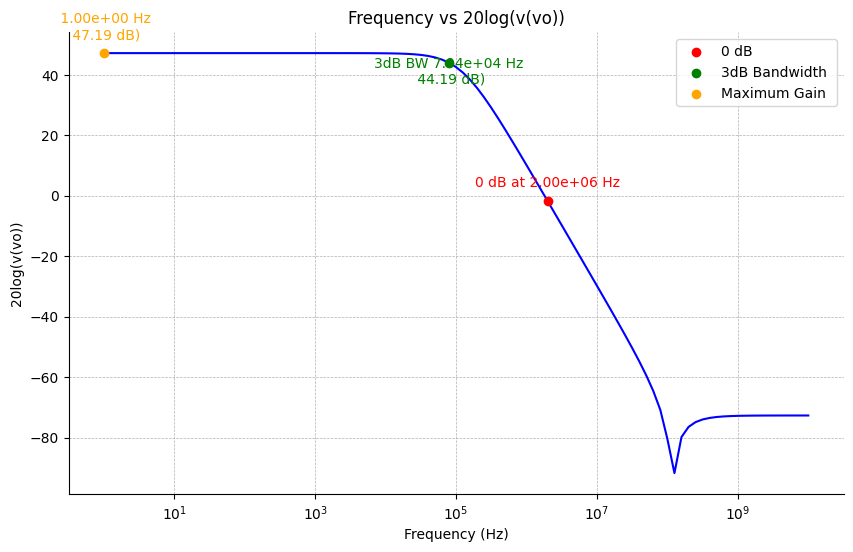

In [33]:
# @title AC gain vs freq

import numpy as np
from matplotlib import pyplot as plt

# Ensure v(vo) is positive before taking the logarithm
df2['v(vo)_positive'] = np.abs(df2['v(vo)'])

# Compute 20log(v(vo)_positive)
df2['20log(v(vo))'] = 20 * np.log10(df2['v(vo)_positive'])

# Find the maximum value of 20log(v(vo))
max_value = df2['20log(v(vo))'].max()
max_index = df2['20log(v(vo))'].idxmax()

# Find the frequency where 20log(v(vo)) falls to 0 and (max - 3 dB)
zero_dB_index = np.argmin(np.abs(df2['20log(v(vo))']))  # Closest to 0 dB
minus_3dB_value = max_value - 3
minus_3dB_index = np.argmin(np.abs(df2['20log(v(vo))'] - minus_3dB_value))  # Closest to (max - 3 dB)

zero_dB_freq = df2.iloc[zero_dB_index]['frequency']
minus_3dB_freq = df2.iloc[minus_3dB_index]['frequency']
max_gain_freq = df2.iloc[max_index]['frequency']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df2['frequency'], df2['20log(v(vo))'], linestyle='-', marker='', color='b')
plt.xscale('log')  # Set the x-axis to logarithmic scale
plt.xlabel('Frequency (Hz)')
plt.ylabel('20log(v(vo))')
plt.title('Frequency vs 20log(v(vo))')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding markers
plt.scatter([zero_dB_freq], [df2.iloc[zero_dB_index]['20log(v(vo))']], color='r', zorder=5, label='0 dB ')
plt.scatter([minus_3dB_freq], [df2.iloc[minus_3dB_index]['20log(v(vo))']], color='g', zorder=5, label='3dB Bandwidth ')
plt.scatter([max_gain_freq], [df2.iloc[max_index]['20log(v(vo))']], color='orange', zorder=5, label='Maximum Gain ')

# Adding annotations
plt.annotate(f'0 dB at {zero_dB_freq:.2e} Hz', (zero_dB_freq, df2.iloc[zero_dB_index]['20log(v(vo))']),
             textcoords="offset points", xytext=(0,10), ha='center', color='r')
plt.annotate(f'3dB BW {minus_3dB_freq:.2e} Hz\n {minus_3dB_value:.2f} dB)', (minus_3dB_freq, df2.iloc[minus_3dB_index]['20log(v(vo))']),
             textcoords="offset points", xytext=(0,-15), ha='center', color='g')
plt.annotate(f' {max_gain_freq:.2e} Hz\n {max_value:.2f} dB)', (max_gain_freq, df2.iloc[max_index]['20log(v(vo))']),
             textcoords="offset points", xytext=(0,10), ha='center', color='orange')

plt.legend()
plt.show()
